In [ ]:
import astropy.io.fits as fits
import numpy as np
import fitsio, os, sys
from astropy.table import Column
from astropy.table import Table
from math import cos,pi,log10
import matplotlib.pylab as plt
import healpy as hp
import pylab as py
from desitarget.geomask import radec_match_to 
#m1, m2, dist = radec_match_to(mtl, sdss[ind], return_sep=True) 


In [ ]:
path='/uufs/chpc.utah.edu/common/home/astro/dawson/sarahE/eboss/Dec2019/'
plotpath='/uufs/chpc.utah.edu/common/home/astro/dawson/sarahE/eboss/Dec2019/plots/'
#print(os.system('ls '+path+'*.fits'))

 eBOSS_QSO_hod_utah_eboss_SGC_v7_trimm_legacy_no-obs.dat.fits    ---> do not use any weight here
 eBOSS_QSO_hod_utah_eboss_SGC_v7_trimm_legacy_no-obs.ran.fits
 
 eBOSS_QSO_hod_utah_eboss_NGC_v7_trimm_legacy_no-obs.dat.fits
 eBOSS_QSO_hod_utah_eboss_NGC_v7_trimm_legacy_no-obs.ran.fits

 eBOSS_LRG_hod_utah_eboss_SGC_v7_trimm_legacy_no-obs.dat.fits
 eBOSS_LRG_hod_utah_eboss_SGC_v7_trimm_legacy_no-obs.ran.fits

 eBOSS_LRG_hod_utah_eboss_NGC_v7_trimm_legacy_no-obs.dat.fits
 eBOSS_LRG_hod_utah_eboss_NGC_v7_trimm_legacy_no-obs.ran.fits

 
 
 eBOSS_LRG_clustering_NGC_v7_COMP_BOSS.ran.fits ---> 
 eBOSS_LRG_clustering_SGC_v7_COMP_BOSS.ran.fits
 
 eBOSS_QSO_clustering_NGC_v7_COMP_BOSS.ran.fits ---> cols: 
 eBOSS_QSO_clustering_SGC_v7_COMP_BOSS.ran.fits
 
 eBOSS_QSO_clustering_NGC_v7_1_COMP_BOSS.ran.fits
 eBOSS_QSO_clustering_SGC_v7_1_COMP_BOSS.ran.fits
 
 eBOSS_QSO_clustering_SGC_v7_1_ids.dat.fits
 eBOSS_QSO_clustering_NGC_v7_1_ids.dat.fits
 
 weights_tiled_QSO_eBOSS_NGC_31x60_trimm_promoted_v7_no-obs.dat
 weights_tiled_QSO_eBOSS_SGC_31x60_trimm_promoted_v7_no-obs.dat
 
  These are ASCII files with columns EBOSS_TARGET_ID, RA, DEC, Z (neglect Z) and a sequence of 60 columns that contain the bitwise weights resulting from the 1860 fiber assignment runs. The first bit in the first of these 60 columns is the outcome of the actual eBOSS tiling run while the remaining bits are random realizations of the tiling. 
 
 
 # w_qso = WEIGHT_FKP*WEIGHT_SYSTOT*(WEIGHT_NOZ + WEIGHT_CP − 1)

In [ ]:
tgt='QSO'

cats=['eBOSS_'+tgt+'_hod_utah_eboss_SGC_v7_trimm_legacy_no-obs.dat.fits',
          'eBOSS_'+tgt+'_hod_utah_eboss_NGC_v7_trimm_legacy_no-obs.dat.fits',
          'eBOSS_'+tgt+'_clustering_SGC_v7_1_ids.dat.fits',
          'eBOSS_'+tgt+'_clustering_NGC_v7_1_ids.dat.fits']

#tgts=['QSO','LRG']


for name in cats:
    a = fits.open(path+name)
    cols = a[1].columns
    print(name,np.shape(a[1].data),cols.names)
    print('----------------------')
    

# Adding comoving distances for targets and randoms

In [ ]:
from astropy.cosmology import FlatLambdaCDM
from math import sqrt, pi

qso = fitsio.read(path+'eBOSS_QSO_clustering_NGC_v7_1_ids.dat.fits')
ran=fitsio.read(path+'eBOSS_QSO_clustering_NGC_v7_1_COMP_BOSS.ran.fits')

cosmo = FlatLambdaCDM(H0=100, Om0=0.307, Tcmb0=2.725)
ss = cosmo.comoving_distance(qso['Z']).value
s = Column(ss,name='s')

t = Table(qso)
t.add_column(s,index=0)
t.write(path+'eBOSS_QSO_clustering_NGC_v7_1_withS.fits')


ss = cosmo.comoving_distance(ran['Z']).value
s = Column(ss,name='s')
tr = Table(ran)
tr.add_column(s,index=0)
tr.write(path+'eBOSS_QSO_clustering_NGC_v7_1_withS.ran.fits')

# Angular Coverage 

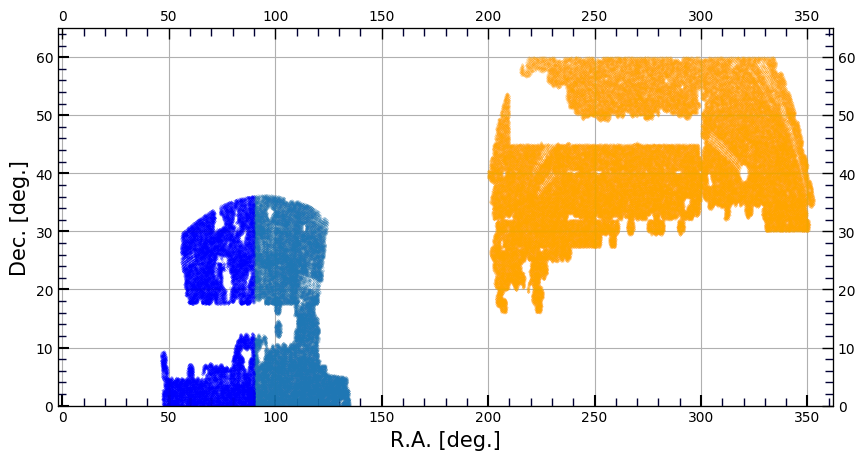

In [219]:
fig = py.figure(figsize=(10, 5), dpi=100)
ax= fig.add_subplot(111)
tgt='QSO'
sq=fitsio.read(path+'eBOSS_'+tgt+'_hod_utah_eboss_SGC_v7_trimm_legacy_no-obs.dat.fits')
nq=fitsio.read(path+'eBOSS_'+tgt+'_hod_utah_eboss_NGC_v7_trimm_legacy_no-obs.dat.fits')

nnq=fitsio.read(path+'eBOSS_'+tgt+'_hod_utah_eboss_NGC_v7_trimm_legacy_no-obs.dat.fits')

ofs=2
xlim = (np.min(sq['RA'])-ofs,np.max(sq['RA'])+ofs )
ylim = (0,65)#(np.min(sq['DEC'])-ofs,np.max(sq['DEC'])+ofs )

ii = (sq['RA']+90 > 360)
py.plot(sq['RA'][~ii]+90,sq['DEC'][~ii],marker='.',markersize=0.1,linestyle='')
py.plot(nq['RA']+90,nq['DEC'],marker='.',markersize=0.1,linestyle='',color='orange')
py.plot(sq['RA'][ii]+90-360,sq['DEC'][ii],marker='.',markersize=0.1,linestyle='',color='blue')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

#ax.set_title(plot_title)
ax.set_xlabel('R.A. [deg.]',fontsize=15)
ax.set_ylabel('Dec. [deg.]',fontsize=15)
ax.minorticks_on()
ax.tick_params(which='major', length=8, width=1.5, direction='in') 
ax.tick_params(which='minor', length=6, color='#000033', width=1.0, direction='in')        

x_ax = ax.twiny()
x_ax.minorticks_on()
x_ax.tick_params(which='major', length=8, width=1.0, direction='in')
x_ax.tick_params(which='minor', length=6, color='#000033', width=1.0, direction='in')     
x_ax.tick_params()
y_ax= plt.twinx()
y_ax.minorticks_on()
x_ax.set_xlim(xlim)
y_ax.set_ylim(ylim)
y_ax.tick_params(which='major', length=8, width=1.0, direction='in')
y_ax.tick_params(which='minor', length=6, color='#000033', width=1.0, direction='in')     
#pylab.savefig(path+output_filename)
ax.grid()
plt.show()


Orange:hod_utah_eboss_SGC_v7_trimm_legacy_no-obs.dat 301680
Green: eBOSS_QSO_clustering_NGC_v7_1_ids.dat 191430


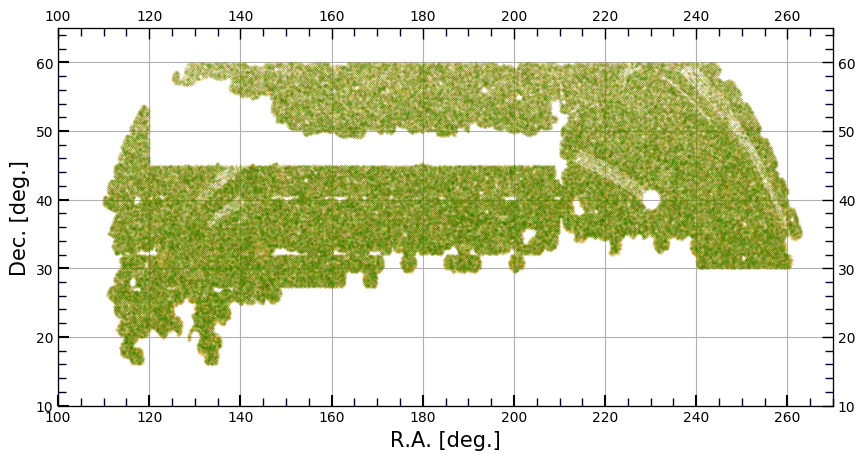

In [217]:
fig = py.figure(figsize=(10, 5), dpi=100)
ax= fig.add_subplot(111)
tgt='QSO'
sq=fitsio.read(path+'eBOSS_'+tgt+'_hod_utah_eboss_SGC_v7_trimm_legacy_no-obs.dat.fits')
nq=fitsio.read(path+'eBOSS_'+tgt+'_hod_utah_eboss_NGC_v7_trimm_legacy_no-obs.dat.fits')
nnq= fitsio.read(path+'eBOSS_QSO_clustering_NGC_v7_1_ids.dat.fits')

print('Orange:hod_utah_eboss_SGC_v7_trimm_legacy_no-obs.dat',len(nq))
print('Green: eBOSS_QSO_clustering_NGC_v7_1_ids.dat',len(nnq))
ofs=2
xlim = (100,270)#(np.min(sq['RA'])-ofs,np.max(sq['RA'])+ofs )
ylim = (10,65)#(np.min(sq['DEC'])-ofs,np.max(sq['DEC'])+ofs )

py.plot(sq['RA'],sq['DEC'],marker='.',markersize=0.1,linestyle='')
py.plot(nq['RA'],nq['DEC'],marker='.',markersize=0.1,linestyle='',color='orange')
py.plot(nnq['RA'],nnq['DEC'],marker='.',markersize=0.1,linestyle='',color='green')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

#ax.set_title(plot_title)
ax.set_xlabel('R.A. [deg.]',fontsize=15)
ax.set_ylabel('Dec. [deg.]',fontsize=15)
ax.minorticks_on()
ax.tick_params(which='major', length=8, width=1.5, direction='in') 
ax.tick_params(which='minor', length=6, color='#000033', width=1.0, direction='in')        

x_ax = ax.twiny()
x_ax.minorticks_on()
x_ax.tick_params(which='major', length=8, width=1.0, direction='in')
x_ax.tick_params(which='minor', length=6, color='#000033', width=1.0, direction='in')     
x_ax.tick_params()
y_ax= plt.twinx()
y_ax.minorticks_on()
x_ax.set_xlim(xlim)
y_ax.set_ylim(ylim)
y_ax.tick_params(which='major', length=8, width=1.0, direction='in')
y_ax.tick_params(which='minor', length=6, color='#000033', width=1.0, direction='in')     
#pylab.savefig(path+output_filename)
ax.grid()
plt.show()


# Normalized redshift distributions match up test

min/max z of QSOs: 0.8000152398143878 2.199999421096105 Mean_Z= 1.5099753101528133
min/max z of RANs: 0.8000152398143878 2.199999421096105 Mean_Z= 1.5093796569217115
Angular scale @ average redshift of the sample: 5.89 kpc/h/arcsec 
4.71 degree is 100 Mpc/h
Comoving distance @ average redshift: 3051.2980076119215, Mpc/h


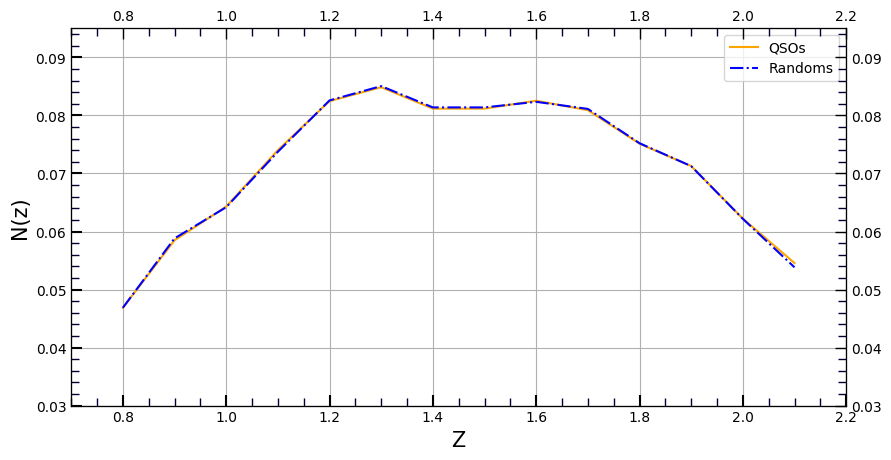

In [218]:
qso=fitsio.read(path+'eBOSS_QSO_clustering_NGC_v7_1_ids.dat.fits')
ran=fitsio.read(path+'eBOSS_QSO_clustering_NGC_v7_1_COMP_BOSS.ran.fits')

fig = py.figure(figsize=(10, 5), dpi=100)
ax= fig.add_subplot(111)

print('min/max z of QSOs:',np.min(qso['Z']),np.max(qso['Z']), 'Mean_Z=',np.mean(qso['Z']))
print('min/max z of RANs:',np.min(ran['Z']),np.max(ran['Z']), 'Mean_Z=',np.mean(ran['Z']))

#This gives a scale of 5.893 kpc/": from Ned Wright cosmo calc;
# conform in astropy

from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=100, Om0=0.307, Tcmb0=2.725)

scale = cosmo.kpc_proper_per_arcmin(np.mean(qso['Z'])).value/60

print('Angular scale @ average redshift of the sample: {} kpc/h/arcsec '.format(np.round(scale,2)))

print( '{} degree is 100 Mpc/h'.format(np.round(100000/scale/3600.,2)))

# Comoving distance at the average red
dc = cosmo.comoving_distance(np.mean(qso['Z']))

print('Comoving distance @ average redshift: {}, {}/h'.format(dc.value,dc.unit))

binsize=0.1
hq,qed = np.histogram(qso['Z'],bins=np.arange(np.min(qso['Z']),np.max(qso['Z']+binsize),binsize), density=True) 
hr,red = np.histogram(ran['Z'],bins=np.arange(np.min(ran['Z']),np.max(ran['Z']+binsize),binsize), density=True) 
#print(qed)
midz = (qed+np.arange(np.min(qso['Z']),np.max(qso['Z'])+binsize,binsize))/2
#print(midz)

####sanity check: 

#print(sum(hq/sum(hq)))   # should be 
#print(sum(hr/sum(hr)))
#print(sum(qso['NZ']*len(qso)))

#sys.exit()
plt.plot(midz[0:len(midz)-1],hq/sum(hq),color='orange')
plt.plot(midz[0:len(midz)-1],hr/sum(hr),color='blue',linestyle='-.')
xlim = (0.7,np.max(qso['Z']) )
ylim = (0.03,np.max(hr/sum(hr))+0.01 )

ax.set_xlim(xlim)
ax.set_ylim(ylim)

#ax.set_title(plot_title)
ax.set_xlabel('Z',fontsize=15)
ax.set_ylabel('N(z)',fontsize=15)
ax.minorticks_on()
ax.tick_params(which='major', length=8, width=1.5, direction='in') 
ax.tick_params(which='minor', length=6, color='#000033', width=1.0, direction='in')        

x_ax = ax.twiny()
x_ax.minorticks_on()
x_ax.tick_params(which='major', length=8, width=1.0, direction='in')
x_ax.tick_params(which='minor', length=6, color='#000033', width=1.0, direction='in')     
x_ax.tick_params()
y_ax= plt.twinx()
y_ax.minorticks_on()
x_ax.set_xlim(xlim)
y_ax.set_ylim(ylim)
y_ax.tick_params(which='major', length=8, width=1.0, direction='in')
y_ax.tick_params(which='minor', length=6, color='#000033', width=1.0, direction='in')     
#pylab.savefig(path+output_filename)
ax.legend(['QSOs','Randoms'])
ax.grid()
plt.show()
  
    


# Luminosity range 

In [ ]:
### get the L_bol and absolute i-magnitude of the quasars sample

# match the RA/DEC or target IDs with main eboss catalog 

# DD(s)  , s= sqrt(rp^2 + pi^2)

In [ ]:
#### post process of output anular pair count 
### binning in comoving distance

%%time

powmax=2.5
powmin=-1.5
delpow=0.2
edges=10.**(np.arange(powmin,powmax,delpow))
mids=[]
for i in range(len(edges)):
        mids.append((10**((powmin)+((i+1)*(delpow)))+10**((powmin)+(i*(delpow))))/2)



import glob
qso = fitsio.read(path+'eBOSS_QSO_clustering_NGC_v7_1_withS.fits')
DDpath = path+'/DD_QSO_v7_1_NGC/'
files = glob.glob(DDpath+'*_DD.fits')

from astropy.cosmology import FlatLambdaCDM
from math import sqrt, pi
cosmo = FlatLambdaCDM(H0=100, Om0=0.307, Tcmb0=2.725)

chunksize=10000
DD = np.zeros(len(edges)-1)
for i,f in enumerate(files):
     
     a = fitsio.read(DDpath+'spherematch.'+str(i)+'_DD.fits') # index1, index2, dist(in degrees)
     print('working on batch # {}, file:{}'.format(i,'spherematch.'+str(i)+'_DD.fits'))
     d = a['dist']
     ind2 = a['index2'] 
     z2 = qso['Z'][ind2]
     ind1 = a['index1']
     print(np.min(ind1),np.max(ind1),)
     s2 = qso['s'][ind2]
     s1 = qso['s'][ind1]
     pi = abs(s1-s2)
     rp = (s1+s2)*d*pi/180./2.
     ss  = np.sqrt(pi**2.+rp**2.)
     hist_s = np.histogram(ss, bins = edges)
     DD += hist_s[0]
     print(len(hist_s[0]))
    
print(DD,len(DD),len(edges),len(mids[0:19]))
    
t=Table()
col = Column(edges[0:19],name='low_edge',dtype='f4')
t.add_column(col,index=0)
col = Column(edges[1:20],name='up_edge',dtype='f4')
t.add_column(col,index=0)
col = Column(mids[0:19],name='Mid_s_mpch',dtype='f4')
t.add_column(col,index=0)
col = Column(DD,name='DD_s',dtype='i8')
t.add_column(col,index=0)
t.write(path+'DD_s_eBOSS_QSO_NGC_v7_1.fits')


# DD(rp) ; rp=(s1+s2)*d*pi/180./2.

In [ ]:
#### post process of output anular pair count 
### binning in comoving distance
powmax=2.5
powmin=-1.5
delpow=0.2
edges=10.**(np.arange(powmin,powmax,delpow))
mids=[]
for i in range(len(edges)):
        mids.append((10**((powmin)+((i+1)*(delpow)))+10**((powmin)+(i*(delpow))))/2)



import glob
qso = fitsio.read(path+'eBOSS_QSO_clustering_NGC_v7_1_withS.fits')
DDpath = path+'/DD_QSO_v7_1_NGC_S/'
files = glob.glob(DDpath+'*_DD.fits')

from astropy.cosmology import FlatLambdaCDM
from math import sqrt, pi
cosmo = FlatLambdaCDM(H0=100, Om0=0.307, Tcmb0=2.725)

chunksize=10000
DD = np.zeros(len(edges)-1)
for i,f in enumerate(files):
     
     a = fitsio.read(DDpath+'spherematch.'+str(i)+'_DD.fits') # index1, index2, dist(in degrees)
     print('working on batch # {}, file:{}'.format(i,'spherematch.'+str(i)+'_DD.fits'))
     d = a['dist']
     ind2 = a['index2'] 
     z2 = qso['Z'][ind2]
     ind1 = a['index1']
     print(np.min(ind1),np.max(ind1),)
     s2 = qso['s'][ind2]
     s1 = qso['s'][ind1]
     pi = abs(s1-s2)
     rp = (s1+s2)*d*pi/180./2.
     ss  = np.sqrt(pi**2.+rp**2.)
     hist_s = np.histogram(ss, bins = edges)
     DD += hist_s[0]
     print(len(hist_s[0]))


# Examining the given weights to each target 

In [ ]:
#w_qso = WEIGHT_FKP*WEIGHT_SYSTOT*(WEIGHT_NOZ + WEIGHT_CP − 1)
w_qso = qso['WEIGHT_FKP']*qso['WEIGHT_SYSTOT']*(qso['WEIGHT_NOZ'] + qso['WEIGHT_CP'] - 1)
print(np.min(w_qso),max(w_qso))

In [259]:
import pandas as pd
#df = pd.DataFrame(lst)
df =  pd.read_csv(path+'weights_tiled_QSO_eBOSS_NGC_31x60_trimm_promoted_v7_no-obs.dat', delimiter='\t', header=None)


#### Each quasar in this file has 60 bits--->  2**31-1 = 2147483647  
#### fiberassignment has benn run 31 * 60 = 1860 times and it is saved in 60 bundles

#### C onverting base-2 binary to integer ------------
# >>> format(5, "b")
# '101'
# >>> 0b101
# 5
# >>> format(2147483647, "b")
# '1111111111111111111111111111111'
#### ------------------------------------------------

q_bits = df.iloc[28,:][0:len(df.iloc[28,:])]
print(format(df.iloc[28,4],"b"))

In [383]:
%%time

tbits = Table()
    
intlist = []    
for i in range(len(df)):
    q_bits = df.iloc[i,:][4:len(df.iloc[i,:])]  #row of 60 bits 
    s = ''
    for bit in list(q_bits):
        
        s += format(int(bit),"b")
                
    intlist.append(s)
    #intlist.append(np.asarray(list(s),dtype='i1'))

CPU times: user 5min 34s, sys: 2.29 s, total: 5min 36s
Wall time: 5min 36s


In [384]:
%%time

weights = intlist 
c=0
for l in weights:
   b = np.asarray(list(l), dtype='i1')
   if sum(b) != 1860:
         c += 1
print(c)        

68203
CPU times: user 4min 5s, sys: 3.63 s, total: 4min 8s
Wall time: 4min 9s


In [381]:
st = intlist[0]
np.asarray(list(st), dtype='i1')

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

# 68,203 NGC-QSOs were not always assigned a fiber in 1860 assignment trials
Out of **381415** NGC quasars in **weights_tiled_QSO_eBOSS_NGC_31x60_trimm_promoted_v7_no-obs.dat**, 17.8% (68203) have at least once not assigned a fiber.

In [385]:
t =  Table()
tgtID = np.asarray(df[0])
col = Column(tgtID,name='ebossID')
t.add_column(col,index=0)

ra = np.asarray(df[1])
col = Column(ra,name='RA')
t.add_column(col,index=0)

dec = np.asarray(df[2])
col = Column(dec,name='DEC')
t.add_column(col,index=0)

zerosones = np.asarray(intlist)
col = Column(zerosones,name='zerosones')
t.add_column(col,index=0)

t.write(path+'tiled_eBOSS_NGC_QSO_RADEC_zerosones.fits')

In [390]:
tiled_qsos = fitsio.read(path+'tiled_eBOSS_NGC_QSO_RADEC_zerosones.fits')        #381,415
qsos = fitsio.read(path+'eBOSS_QSO_clustering_NGC_v7_1_withS.fits')  #191,430


m1, m2, dist = radec_match_to(tiled_qsos, qsos, return_sep=True) 

print(len(qso[m2]))
 
tb = Table(qsos)  

zerosones = (tiled_qsos['zerosones'][m1])
col = Column(zerosones,name='zerosones')
tb.add_column(col,index=0)

tb.write(path+'eBOSS_QSO_clustering_NGC_v7_1_withS_zerosones.fits')
    


191430


In [391]:
import glob
qso = fitsio.read(path+'eBOSS_QSO_clustering_NGC_v7_1_withS_zerosones.fits')
DDpath = path+'/DD_QSO_v7_1_NGC/'
files = glob.glob(DDpath+'*_DD.fits')

from astropy.cosmology import FlatLambdaCDM
from math import sqrt, pi
cosmo = FlatLambdaCDM(H0=100, Om0=0.307, Tcmb0=2.725)

chunksize=10000
DD = np.zeros(len(edges)-1)

wlist = []
for l in list(qso['zerosones'][0:2]):
   b = np.asarray(list(l), dtype='i1')
   wlist.append(b)

warr= np.asarray(wlist) 
print(warr[0]*warr[1])
sys.exit()

for i,f in enumerate(files):
     
     a = fitsio.read(DDpath+'spherematch.'+str(i)+'_DD.fits') # index1, index2, dist(in degrees)
     print('working on batch # {}, file:{}'.format(i,'spherematch.'+str(i)+'_DD.fits'))
     d = a['dist']
     ind2 = a['index2'] 
     z2 = qso['Z'][ind2]
     ind1 = a['index1']
     print(np.min(ind1),np.max(ind1),)
     print(np.min(ind1),np.max(ind1),)
     s2 = qso['s'][ind2]
     s1 = qso['s'][ind1]
     w1 = warr[ind1]
     w2 = warr[ind2]
     PIP = 1./sum(w1*w2)
     pi = abs(s1-s2)
     rp = (s1+s2)*d*pi/180./2.
     ss  = np.sqrt(pi**2.+rp**2.)
     hist_s = np.histogram(ss, bins = edges)
     DD += hist_s[0]
     print(len(hist_s[0]))
    
print(DD,len(DD),len(edges),len(mids[0:19]))
    
t=Table()
col = Column(edges[0:19],name='low_edge',dtype='f4')
t.add_column(col,index=0)
col = Column(edges[1:20],name='up_edge',dtype='f4')
t.add_column(col,index=0)
col = Column(mids[0:19],name='Mid_s_mpch',dtype='f4')
t.add_column(col,index=0)
col = Column(DD,name='DD_s',dtype='i8')
t.add_column(col,index=0)
t.write(path+'DD_s_eBOSS_QSO_NGC_v7_1_withPIPs.fits')
     

OverflowError: Python int too large to convert to C long